In [9]:
#Vérifier que le dossier est bien la en executant cette celulle. L'output doit être les 8 classes
!ls 'Images/PBC_dataset_normal_DIB'

'ls' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [3]:
#import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL
import PIL.Image
from PIL import Image
from sklearn.model_selection import train_test_split

In [10]:
#import avec os 
import os
import cv2

#Chemin initial
dir_path = 'Images/PBC_dataset_normal_DIB'
img_path = []
target = []

#creation de la boucle en allant chercher les premiers dossiers
for folder in os.listdir(path=dir_path):
  #on utilise join pour créer un nouveau path reprenant chaque nom de folder
  path = os.path.join(dir_path, folder)
  #on utilise ces nouveaux paths pour aller chercher les images
  for img_file in os.listdir(path=path):
    #on append la liste avec le chemin des images
    img_each_path = os.path.join(dir_path, folder, img_file)
    img_path.append(img_each_path)

    #travaille sur la variable target : je divise la phrase au premier _
    split_string = img_file.split("_")
    #je récupère le premier élément et je le rajoute au folder name:
    target_name = folder + '_' + split_string[0]
    #je cet élement à la liste target
    target.append(target_name)

#je crée un dictionnaire pour le dataframe:
data = {
    'Path' : img_path,
    'target' : target
}

#je crée le dataframe
data = pd.DataFrame(data)

In [11]:
#Je vérifie que cela a bien fonctionné et je crée une copy
df = data.copy()
df.head()

,Path,target
0,Images/PBC_dataset_normal_DIB\basophil\BA_1001...,basophil_BA
1,Images/PBC_dataset_normal_DIB\basophil\BA_1013...,basophil_BA
2,Images/PBC_dataset_normal_DIB\basophil\BA_1016...,basophil_BA
3,Images/PBC_dataset_normal_DIB\basophil\BA_1020...,basophil_BA
4,Images/PBC_dataset_normal_DIB\basophil\BA_1027...,basophil_BA


In [8]:
df.shape

(17093, 2)

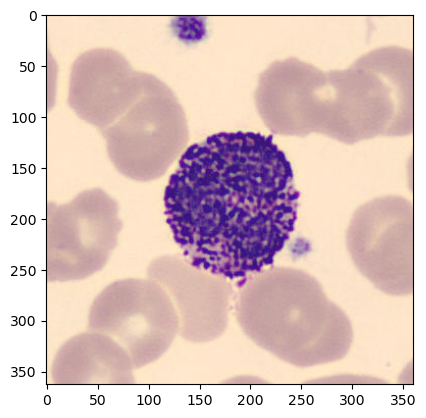

In [12]:
#Je vérifie que je peux lire une image
plt.figure()
img = plt.imread(df.iloc[1,0])
plt.imshow(img)
plt.show()

Data Cleaning

In [13]:
df.target.value_counts()
#voir combien de catégorie

eosinophil_EO            3117
platelet_PLATELET        2348
neutrophil_SNE           1646
neutrophil_BNE           1633
erythroblast_ERB         1551
monocyte_MO              1420
basophil_BA              1218
lymphocyte_LY            1214
ig_MY                    1137
ig_MMY                   1015
ig_PMY                    592
ig_IG                     151
neutrophil_NEUTROPHIL      50
neutrophil_.DS              1
Name: target, dtype: int64

In [14]:
def target_enginneering(df):
  df = df.drop(df.loc[df['target'] == 'neutrophil_.DS'].index) #cette photo ne fonctionne pas
  df = df.replace(to_replace='eosinophil_EO', value='EOS')
  df = df.replace(to_replace='platelet_PLATELET', value='PLAT')
  df = df.replace(to_replace=['neutrophil_SNE', 'neutrophil_BNE', 'neutrophil_NEUTROPHIL'], value='NEU')
  df = df.replace(to_replace=['ig_MY', 'ig_MMY', 'ig_PMY', 'ig_IG'], value='IG')
  df = df.replace(to_replace='basophil_BA', value='BAS')
  df = df.replace(to_replace='lymphocyte_LY', value='LYM')
  df = df.replace(to_replace='monocyte_MO', value='MON')
  df = df.replace(to_replace='erythroblast_ERB', value='ERB')
  return df

In [12]:
print(df.shape)
df_cleaned = target_enginneering(df)
print(df_cleaned.shape)

(17093, 2)
(17092, 2)


In [13]:
#création d'un nouveau dataframe clean et sauvegarde
df_cleaned.to_csv('Dataframe/df_cleaned.csv', index=False)

In [15]:
#séparation du dataframe en train et test
train_df, test_df = train_test_split(df_cleaned, test_size=0.2, random_state = 2023)

#sauvegarde des dataframe d'entrainement et de test
train_df.to_csv('Dataframe/train_df.csv', index=False)
test_df.to_csv('Dataframe/test_df.csv', index=False)

print('le dataframe train a une taille de :', train_df.shape)
print('le dataframe test a une taille de :', test_df.shape)

le dataframe train a une taille de : (13673, 2)
le dataframe test a une taille de : (3419, 2)
